# Install and Import the libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

# Data Manipulation libraries
import pandas as pd
import numpy as np

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Estimators and metrics
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,roc_curve,auc,roc_auc_score,accuracy_score

# NLP libraries
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec,KeyedVectors

import re
import pickle

from tqdm import tqdm
from collections import Counter
from scipy.sparse import hstack
#Code Reference: https://ptable.readthedocs.io/en/latest/tutorial.html
from prettytable import PrettyTable


In [4]:
# Read the data into Pandas Dataframe

project_data= pd.read_csv('../train_data.csv')
resource_data = pd.read_csv('../resources.csv')

In [5]:
print('Number of data points in the  Train dataset :',project_data.shape[0])
print("-"*53)
print('Number of features in the Train dataset :',project_data.shape[1])
print("-"*53)
print("List of Features in the Train dataset:\n",project_data.columns.values.tolist())

Number of data points in the  Train dataset : 109248
-----------------------------------------------------
Number of features in the Train dataset : 17
-----------------------------------------------------
List of Features in the Train dataset:
 ['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state', 'project_submitted_datetime', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'project_title', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved']


In [6]:
print('Number of data points in the  Resourse dataset :',resource_data.shape[0])
print("-"*55)
print('Number of features in the Resourse dataset :',resource_data.shape[1])
print("-"*55)
print("List of Features in the Resourse dataset:",resource_data.columns.values.tolist())

Number of data points in the  Resourse dataset : 1541272
-------------------------------------------------------
Number of features in the Resourse dataset : 4
-------------------------------------------------------
List of Features in the Resourse dataset: ['id', 'description', 'quantity', 'price']


In [7]:
cols=['Date' if each_col=='project_submitted_datetime' else each_col for each_col in project_data.columns.values.tolist()] 

project_data['Date']=pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime',axis=1,inplace=True)
project_data.sort_values(by=['Date'],inplace=True)

In [8]:
project_data=project_data[cols]

print("Sample records from  Training data ")
project_data.head()

Sample records from  Training data 


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Literacy & Language,Literacy,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1


In [9]:
print("Sample records from  Resourse data ")
resource_data.head(5)

Sample records from  Resourse data 


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


# Data Preprocessing

## chek for null values

In [10]:
print("Null values from Train data :\n")
print(project_data.isnull().sum())

Null values from Train data :

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
Date                                                 0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64


In [11]:
project_data['teacher_prefix'].fillna(method='ffill',inplace=True)

In [12]:
project_data['essay']=project_data.project_essay_1.map(str)+\
project_data.project_essay_2.map(str)+\
project_data.project_essay_3.map(str)+\
project_data.project_essay_4.map(str)


In [13]:
project_data.drop(columns=['project_essay_1','project_essay_2',
                           'project_essay_3','project_essay_4'],axis=1,inplace=True)

In [14]:
project_data.isnull().sum()

Unnamed: 0                                      0
id                                              0
teacher_id                                      0
teacher_prefix                                  0
school_state                                    0
Date                                            0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
project_title                                   0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
essay                                           0
dtype: int64

In [15]:
print("Null values from Train data :\n")
print(resource_data.isnull().sum())


Null values from Train data :

id               0
description    292
quantity         0
price            0
dtype: int64


In [16]:
resource_data['description'].fillna(method='ffill',inplace=True)

In [17]:
resource_data.isnull().sum()

id             0
description    0
quantity       0
price          0
dtype: int64

## Text Pre-processing

In [18]:
def processed_list(list_elements):
    processed_list=[]
    for i in list_elements:
        temp=''
        for j in i.split(','):
            if 'The' in j.split():
                j=j.replace('The','')
            j=j.replace(' ','')
            temp+=j.strip()+' '
            temp=temp.replace('&','_')
        processed_list.append(temp.strip())
    return processed_list

In [19]:
def get_sorted_dic(col):
    my_Counter=Counter() 
    for word in list(project_data[col]):
        my_Counter.update(word.split())   
    count_dict=dict(my_Counter)
    return dict(sorted(count_dict.items(),key=lambda x: x[1]))
    

### project_subject_categories

In [20]:
clean_categories=processed_list(list(project_data['project_subject_categories']))
project_data['clean_categories']=clean_categories
project_data.drop(['project_subject_categories'],axis=1,inplace=True)
sorted_cat_dict=get_sorted_dic('clean_categories')

### project_subject_subcategories

In [21]:
clean_sub_categories=processed_list(list(project_data['project_subject_subcategories']))
project_data['clean_sub_categories']=clean_sub_categories
project_data.drop(['project_subject_subcategories'],axis=1,inplace=True)
sorted_subcat_dict=get_sorted_dic('clean_sub_categories')

### essay

In [22]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [24]:
def text_processing(dataset,feature_name):
    processed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(dataset[feature_name].values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        processed_text.append(sent.lower().strip())
    return processed_text

In [25]:
project_data['essay']=text_processing(project_data,'essay')

100%|██████████| 109248/109248 [01:09<00:00, 1563.00it/s]


### project_title

In [26]:
project_data['project_title']=text_processing(project_data,'project_title')

100%|██████████| 109248/109248 [00:03<00:00, 35090.04it/s]


### project_resource_summary

In [27]:
project_data['project_resource_summary']=text_processing(project_data,'project_resource_summary')

100%|██████████| 109248/109248 [00:07<00:00, 14748.89it/s]


### project_grade_category

In [28]:
processed_grade=[]

for each_grade in tqdm(project_data['project_grade_category'].values):
    temp=""
    temp=each_grade.lower()
    temp=temp.replace(' ','_')
    temp=temp.replace('-','_')
    processed_grade.append(temp)
    
project_data['project_grade_category']=processed_grade

100%|██████████| 109248/109248 [00:00<00:00, 927004.65it/s]


In [29]:
# Merge the projectdata and pricedata by using id feature

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [30]:
print("Final Feature Names:\n\n", list(project_data.columns))
print("\nSample Data set")
project_data.head()

Final Feature Names:

 ['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state', 'Date', 'project_grade_category', 'project_title', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved', 'essay', 'clean_categories', 'clean_sub_categories', 'quantity', 'price']

Sample Data set


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,clean_categories,clean_sub_categories,quantity,price
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,grades_prek_2,engineering steam primary classroom,students need stem kits learn critical science...,53,1,fortunate enough use fairy tale stem kits clas...,Math_Science,AppliedSciences Health_LifeScience,4,725.05
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,grades_3_5,sensory tools focus,students need boogie boards quiet sensory brea...,4,1,imagine 8 9 years old third grade classroom se...,SpecialNeeds,SpecialNeeds,8,213.03
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,grades_prek_2,mobile learning mobile listening center,students need mobile listening center able enh...,10,1,class 24 students comes diverse learners stude...,Literacy_Language,Literacy,1,329.00
3,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,grades_prek_2,flexible seating flexible learning,students need flexible seating classroom choos...,2,1,recently read article giving students choice l...,AppliedLearning,EarlyDevelopment,9,481.04
4,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,grades_3_5,going deep art inner thinking,students need copies new york times best selle...,2,1,students crave challenge eat obstacles breakfa...,Literacy_Language,Literacy,14,17.74


In [31]:
#Code Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

project_data=project_data.sample(frac=0.5, replace=True, random_state=1)

In [32]:
y = project_data['project_is_approved'].values
X=project_data.drop(['project_is_approved'], axis=1)
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,clean_categories,clean_sub_categories,quantity,price
98539,95017,p254456,9e83980c4f5a9a64707ba09014f38264,Mrs.,IN,2017-03-15 09:50:22,grades_6_8,project based learning math ela,students need creative supplies student choice...,7,1,response intervention rti provides students ad...,Literacy_Language Math_Science,Literature_Writing Mathematics,66,405.23
77708,149005,p126727,5bcb37aed9472f478d8b39f26e481afe,Mrs.,SD,2016-12-25 22:48:22,grades_prek_2,letters words listening oh,students need tools enhance hands learning wor...,0,1,students want tools word work station make eng...,Literacy_Language,Literacy Literature_Writing,28,127.45
5192,39234,p112042,98cf2c0111aab102efbe9651f05f419e,Ms.,NY,2016-05-24 19:02:20,grades_prek_2,flexible seating classroom flexible minds control,students need flower shaped table collaborativ...,0,1,interested closing learning gap meeting studen...,Literacy_Language AppliedLearning,Literacy Other,7,283.08


In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [34]:
print("Training data set shape:",X_train.shape)
print("Test data set shape:",X_test.shape)

Training data set shape: (38236, 15)
Test data set shape: (16388, 15)


## Feature Vectorization

### teacher_prefix

In [35]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.teacher_prefix.values)
X_tr_teacher_onehot=vectorizer.transform(X_train.teacher_prefix.values)
X_te_teacher_onehot=vectorizer.transform(X_test.teacher_prefix.values)

###  school_state

In [36]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.school_state.values)
X_tr_school_onehot=vectorizer.transform(X_train.school_state.values)
X_te_school_onehot=vectorizer.transform(X_test.school_state.values)

### project_grade_category

In [37]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.project_grade_category.values)
X_tr_grade_onehot=vectorizer.transform(X_train.project_grade_category.values)
X_te_grade_onehot=vectorizer.transform(X_test.project_grade_category.values)

###  clean_categories

In [38]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.clean_categories.values)
X_tr_cat_onehot=vectorizer.transform(X_train.clean_categories.values)
X_te_cat_onehot=vectorizer.transform(X_test.clean_categories.values)

### clean_sub_categories

In [39]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.clean_sub_categories.values)
X_tr_sub_cat_onehot=vectorizer.transform(X_train.clean_sub_categories.values)
X_te_sub_cat_onehot=vectorizer.transform(X_test.clean_sub_categories.values)

## Normalization

### price

In [40]:
nrml= Normalizer()
nrml.fit(X_train['price'].values.reshape(1,-1))

X_tr_price_nrml = nrml.transform(X_train.price.values.reshape(1,-1)).reshape(-1,1)
X_te_price_nrml = nrml.transform(X_test.price.values.reshape(1,-1)).reshape(-1,1)


### teacher_number_of_previously_posted_projects

In [41]:
nrml = Normalizer()
nrml.fit(X_train.teacher_number_of_previously_posted_projects.values.reshape(1,-1))
X_tr_teacher_number_nrml = nrml.transform(X_train.teacher_number_of_previously_posted_projects.values.reshape(1,-1)).reshape(-1,1)
X_te_teacher_number_nrml = nrml.transform(X_test.teacher_number_of_previously_posted_projects.values.reshape(1,-1)).reshape(-1,1)


In [42]:
X_tr_vec=hstack((X_tr_teacher_onehot,X_tr_school_onehot,X_tr_grade_onehot,X_tr_cat_onehot,
                 X_tr_sub_cat_onehot,X_tr_price_nrml,X_tr_teacher_number_nrml)).tocsr()
X_te_vec=hstack((X_te_teacher_onehot,X_te_school_onehot,X_te_grade_onehot,X_te_cat_onehot, X_te_sub_cat_onehot,
                 X_te_price_nrml,X_te_teacher_number_nrml)).tocsr()

In [43]:
print("After stacking :")
print("Training data set shape :",X_tr_vec.shape)
print("Test data set shape :",X_te_vec.shape)

After stacking :
Training data set shape : (38236, 101)
Test data set shape : (16388, 101)


#  Model Training

## Hypertuning Values

In [44]:
k_values=[1,5,11,19,29,41,59,71,87,99,115]

In [45]:
def cross_validate_Knn(hyper_vals,X_train,y_train):
    auc_scores={}
    train_auc=[]
    cv_auc=[]
    
    for each_k in tqdm(hyper_vals):
        knn_clf=KNeighborsClassifier(n_neighbors=each_k,n_jobs=-1)
        auc_scores[each_k]=cross_validate(knn_clf, X_train, y_train, cv=3, scoring='roc_auc',return_train_score=True)
        
    for each_k in hyper_vals:
        train_auc.append(auc_scores[each_k]['train_score'].mean())
        cv_auc.append(auc_scores[each_k]['test_score'].mean())
 
    plt.plot(hyper_vals, train_auc, label='Train AUC')
    plt.scatter(hyper_vals,train_auc)

    plt.plot(hyper_vals, cv_auc, label='CV AUC')
    plt.scatter(hyper_vals,cv_auc)
    
    plt.title("AUC PLOT for Train and CV datasets")
    plt.legend()
    plt.xlabel("K: Number of Nearest Neighborhoos")
    plt.ylabel("AUC")
  
    plt.show()
    
    del auc_scores
    del train_auc
    del cv_auc

In [120]:
def grid_search_KNN(model,hyper_param,hyper_values,X_train,y_train):
    
    clf = GridSearchCV(model, hyper_param, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1,verbose=3)
    clf.fit(X_train, y_train)
    
    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']

    plt.plot(hyper_values, train_auc, label='Train AUC')
    plt.scatter(hyper_values,train_auc)
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(hyper_values,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(hyper_values, cv_auc, label='CV AUC')
    plt.scatter(hyper_values,cv_auc)
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(hyper_values,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.legend()
    plt.xlabel("K: Number of Nearest Neighborhoos")
    plt.ylabel("AUC")
    plt.title("AUC PLOT for Train and CV datasets")
    plt.show()
    
    del train_auc
    del train_auc_std
    del cv_auc
    del cv_auc_std


In [48]:
def build_best_model_plot_roc(model,X_train_data,y_train_data,X_test_data,y_test_data):
    
  
    model.fit(X_train_data,y_train_data)
    
    
    y_tr_pred_prob=batch_predict(model,X_train_data)
    y_te_pred_prob=batch_predict(model,X_test_data)
    
    plot_roc([y_train_data,y_tr_pred_prob],[y_test_data,y_te_pred_prob])
    
    del y_tr_pred_prob
    del y_te_pred_prob
    

In [49]:
def plot_roc(y_train,y_test):
    fpr_tr,tpr_tr,thr_tr=roc_curve(y_train[0],y_train[1])
    fpr_te,tpr_te,thr_te=roc_curve(y_test[0],y_test[1])
    
    plt.plot(fpr_tr,tpr_tr,label="AUC score for Train data is : {}".format(np.round(auc(fpr_tr,tpr_tr),4)))
    plt.plot(fpr_te,tpr_te,label="AUC score is Test data is  : {}".format(np.round(auc(fpr_te,tpr_te),4)))

    plt.plot([0,1],[0,1],'k--',label="Random Curve AUC score is :{}".format(0.5))

    plt.title("ROC Curve for Train and Test data")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    print('-'*90)
    cutoof_thr=thr_tr[np.argmax(tpr_tr*(1-fpr_tr))]
    
    print("The Maximum value of 'TPR*(1-FPR)' is {} for 'THRESHOLD VALUE'of {}"
          .format(max(tpr_tr*(1-fpr_tr)),np.round(cutoof_thr,3)))
    
    print('-'*90)
    
    y_train_pred=predict_with_best_t(y_train[1],cutoof_thr)
    y_test_pred=predict_with_best_t(y_test[1],cutoof_thr)
    
    plot_confusion_matrix(y_train[0],y_train_pred,"TRAIN DATA")
    plot_confusion_matrix(y_test[0],y_test_pred,"TEST DATA")
    
    del y_train_pred
    del y_test_pred

In [50]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [51]:
def predict_with_best_t(pred_proba, cut_off):
    pred= []
    for i in pred_proba:
        if i>=cut_off:
            pred.append(1)
        else:
            pred.append(0)
    return pred

In [52]:
def plot_confusion_matrix(y_true,y_pred,set_name):
    sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt="d",cmap="YlGnBu")
    plt.title("Confusion Matrix for {}".format(set_name))
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()

## Bag of words

###  project_title

In [83]:

vectorizer=CountVectorizer(ngram_range=(1,2),max_features=1000,min_df=10)
vectorizer.fit(X_train.project_title.values)
X_tr_title=vectorizer.transform(X_train.project_title.values)
X_te_title=vectorizer.transform(X_test.project_title.values)

### essay

In [84]:
vectorizer=CountVectorizer(ngram_range=(1,2),max_features=3000,min_df=10)
vectorizer.fit(X_train.essay.values)
X_tr_essay=vectorizer.transform(X_train.essay.values)
X_te_essay=vectorizer.transform(X_test.essay.values)

###  project_resource_summary

In [85]:
vectorizer=CountVectorizer(ngram_range=(1,2),max_features=3000,min_df=10)
vectorizer.fit(X_train.project_resource_summary.values)
X_tr_resource=vectorizer.transform(X_train.project_resource_summary.values)
X_te_resource=vectorizer.transform(X_test.project_resource_summary.values)

In [86]:
X_train_bow=hstack((X_tr_vec,X_tr_title,X_tr_resource,X_tr_essay)).tocsr()
X_test_bow=hstack((X_te_vec,X_te_title,X_te_resource,X_te_essay)).tocsr()

In [87]:
print("Bag of words:")
print("Training data set shape :",X_train_bow.shape)
print("Test data set shape :",X_test_bow.shape)

Bag of words:
Training data set shape : (38236, 7101)
Test data set shape : (16388, 7101)


In [88]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

### Find the right 'K' and build bestmodel

100%|██████████| 11/11 [46:44<00:00, 254.92s/it]


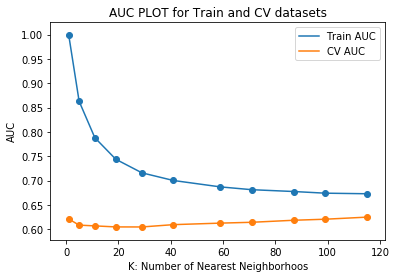

In [89]:
cross_validate_Knn(k_values,X_train_bow,y_train)

In [90]:
print("Hyper parameter Values:",k_values)

Hyper parameter Values: [1, 5, 11, 19, 29, 41, 59, 71, 87, 99, 115]


In [91]:
best_model=KNeighborsClassifier(n_jobs=-1,n_neighbors=41)

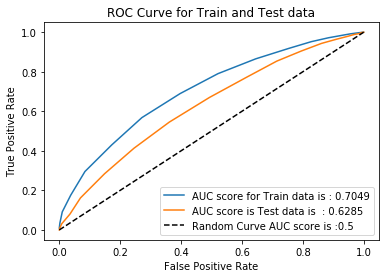

------------------------------------------------------------------------------------------
The Maximum value of 'TPR*(1-FPR)' is 0.415910946923232 for 'THRESHOLD VALUE'of 0.829
------------------------------------------------------------------------------------------


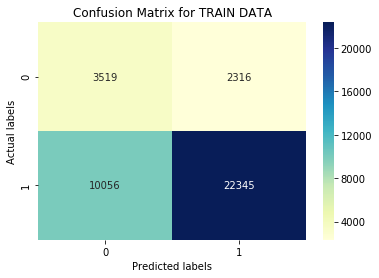

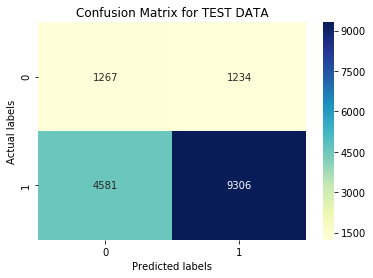

In [92]:
build_best_model_plot_roc(best_model,X_train_bow,y_train,X_test_bow,y_test)

In [93]:
del X_train_bow
del X_test_bow

##  TF-IDF

###  project_title

In [105]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=1000,min_df=10)
tf_idf_vectorizer.fit(X_train.project_title.values)
X_tr_title=tf_idf_vectorizer.transform(X_train.project_title.values)
X_te_title=tf_idf_vectorizer.transform(X_test.project_title.values)

### essay

In [106]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=3000,min_df=10)
tf_idf_vectorizer.fit(X_train.essay.values)
X_tr_essay=tf_idf_vectorizer.transform(X_train.essay.values)
X_te_essay=tf_idf_vectorizer.transform(X_test.essay.values)


### project_resource_summary

In [107]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=3000,min_df=10)
tf_idf_vectorizer.fit(X_train.project_resource_summary.values)
X_tr_resource=tf_idf_vectorizer.transform(X_train.project_resource_summary.values)
X_te_resource=tf_idf_vectorizer.transform(X_test.project_resource_summary.values)

In [108]:
X_train_tfidf=hstack((X_tr_vec,X_tr_title,X_tr_resource,X_tr_essay)).tocsr()
X_test_tfidf=hstack((X_te_vec,X_te_title,X_te_resource,X_te_essay)).tocsr()

In [109]:
print("TF-IDF:")
print("Training data set shape :",X_train_tfidf.shape)
print("Test data set shape :",X_test_tfidf.shape)

TF-IDF:
Training data set shape : (38236, 7101)
Test data set shape : (16388, 7101)


In [110]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

### Finding right "K" and build model 

100%|██████████| 11/11 [48:47<00:00, 266.18s/it]


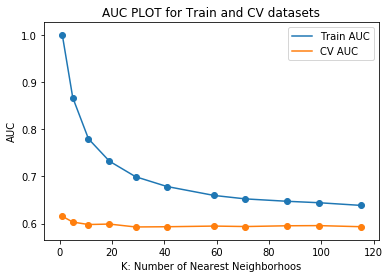

In [100]:
cross_validate_Knn(k_values,X_train_tfidf,y_train)

In [101]:
print("Hyper parameters:",k_values)

Hyper parameters: [1, 5, 11, 19, 29, 41, 59, 71, 87, 99, 115]


In [103]:
best_model=KNeighborsClassifier(n_jobs=-1,n_neighbors=19)

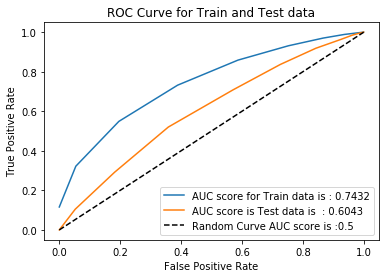

------------------------------------------------------------------------------------------
The Maximum value of 'TPR*(1-FPR)' is 0.4476017235495842 for 'THRESHOLD VALUE'of 0.842
------------------------------------------------------------------------------------------


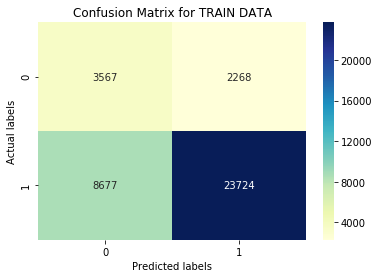

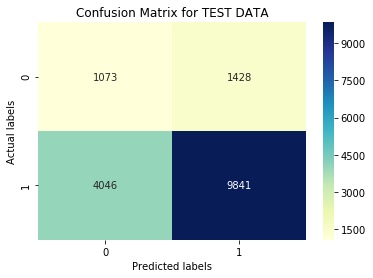

In [104]:

build_best_model_plot_roc(best_model,X_train_tfidf,y_train,X_test_tfidf,y_test)

In [ ]:
del X_train_tfidf
del X_test_tfidf

## Avg W2V

In [53]:
# stronging variables into pickle files python: 
#http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('../glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [54]:
# average Word2Vec
def avg_w2vec(glove_words,feature_values):
    # compute average word2vec for each review.
    avg_w2v_vec = []; # the avg-w2v for each sentence/review is stored in this list
    
    for sent in tqdm(feature_values): # for each review/sentence
        sent_vec = np.zeros(300) # as word vectors are of zero length 300, you might need to 
                                #change this to 300 if you use google's w2v
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent.split(): # for each word in a review/sentence
            if word in glove_words:
                sent_vec += model[word]
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        avg_w2v_vec.append(sent_vec)
       
    print(len(avg_w2v_vec))
    print(len(avg_w2v_vec[0]))
    
    return avg_w2v_vec

###  project_title

In [55]:
X_tr_title=avg_w2vec(glove_words,X_train.project_title.values)


100%|██████████| 38236/38236 [00:00<00:00, 61482.88it/s]

38236
300


In [56]:
X_te_title=avg_w2vec(glove_words,X_test.project_title.values)

100%|██████████| 16388/16388 [00:00<00:00, 53773.51it/s]

16388
300


### essay

In [57]:
X_tr_essay=avg_w2vec(glove_words,X_train.essay.values)


100%|██████████| 38236/38236 [00:11<00:00, 3322.02it/s]

38236
300


In [58]:
X_te_essay=avg_w2vec(glove_words,X_test.essay.values)

100%|██████████| 16388/16388 [00:04<00:00, 3353.07it/s]

16388
300


###  project_resource_summary

In [59]:
X_tr_resource=avg_w2vec(glove_words,X_train.project_resource_summary.values)

100%|██████████| 38236/38236 [00:01<00:00, 28730.82it/s]

38236
300


In [60]:
X_te_resource=avg_w2vec(glove_words,X_test.project_resource_summary.values)

100%|██████████| 16388/16388 [00:00<00:00, 27762.59it/s]

16388
300


In [61]:
X_train_awv=hstack((X_tr_vec,X_tr_title,X_tr_essay,X_tr_resource)).tocsr()
X_test_awv=hstack((X_te_vec,X_te_title,X_te_essay,X_te_resource)).tocsr()

print("Average Word 2 vector:")
print("Training data set shape :",X_train_awv.shape)
print("Test data set shape :",X_test_awv.shape)

Average Word 2 vector:
Training data set shape : (38236, 1001)
Test data set shape : (16388, 1001)


### Find the right 'K' and build the Classifier 

100%|██████████| 11/11 [5:07:08<00:00, 1675.34s/it] 


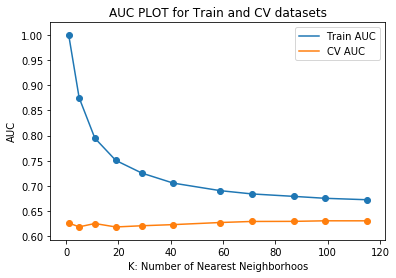

In [62]:
cross_validate_Knn(k_values,X_train_awv,y_train)
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

In [63]:
print("Hyper parameters:",k_values)

Hyper parameters: [1, 5, 11, 19, 29, 41, 59, 71, 87, 99, 115]


In [64]:
best_model=KNeighborsClassifier(n_jobs=-1,n_neighbors=11)

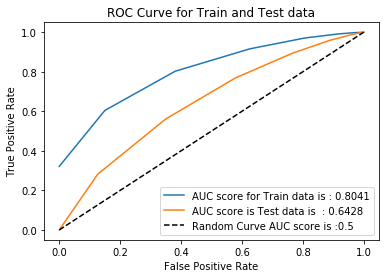

------------------------------------------------------------------------------------------
The Maximum value of 'TPR*(1-FPR)' is 0.5139963652247977 for 'THRESHOLD VALUE'of 0.909
------------------------------------------------------------------------------------------


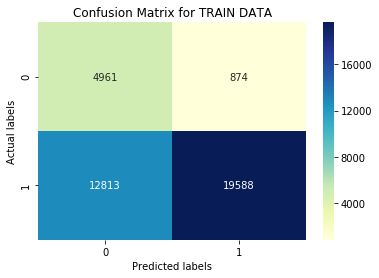

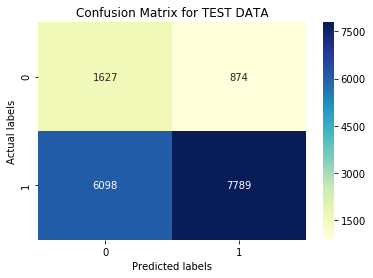

In [65]:
build_best_model_plot_roc(best_model,X_train_awv,y_train,X_test_awv,y_test)

## TF-IDF AW2V

In [66]:
def tfidf_avgw2v(glove_words,tfidf_words,feature_values):
    processed_tfidf_w2v= []; # the avg-w2v for TITLE is stored in this list
    for sentence in tqdm(feature_values): # for each TITLE
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the TITLE
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        processed_tfidf_w2v.append(vector)

    print(len(processed_tfidf_w2v))
    print(len(processed_tfidf_w2v[0]))
    
    return processed_tfidf_w2v

### essay

In [67]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train.essay.values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [68]:
X_tr_essay= tfidf_avgw2v(glove_words,tfidf_words,X_train.essay.values)

100%|██████████| 38236/38236 [01:14<00:00, 511.50it/s]

38236
300


In [69]:
X_te_essay= tfidf_avgw2v(glove_words,tfidf_words,X_test.essay.values)


100%|██████████| 16388/16388 [00:31<00:00, 519.84it/s]

16388
300


### project_title

In [70]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train.project_title.values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [71]:
X_tr_title=tfidf_avgw2v(glove_words,tfidf_words,X_train.project_title.values)

100%|██████████| 38236/38236 [00:01<00:00, 26874.80it/s]

38236
300


In [72]:
X_te_title=tfidf_avgw2v(glove_words,tfidf_words,X_test.project_title.values)

100%|██████████| 16388/16388 [00:00<00:00, 28886.74it/s]

16388
300


### project_resource_summary

In [73]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train.project_resource_summary.values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [74]:
X_tr_resource=tfidf_avgw2v(glove_words,tfidf_words,X_train.project_resource_summary.values)

100%|██████████| 38236/38236 [00:03<00:00, 9615.56it/s]

38236
300


In [75]:
X_te_resource=tfidf_avgw2v(glove_words,tfidf_words,X_test.project_resource_summary.values)

100%|██████████| 16388/16388 [00:01<00:00, 9576.71it/s]

16388
300


In [76]:
X_train_tfidfawv=hstack((X_tr_vec,X_tr_title,X_tr_essay,X_tr_resource)).tocsr()
X_test_tfidfawv=hstack((X_te_vec,X_te_title,X_te_essay,X_te_resource)).tocsr()

In [77]:
print("Average Word 2 vector:")
print("Training data set shape :",X_train_tfidfawv.shape)
print("Test data set shape :",X_test_tfidfawv.shape)

Average Word 2 vector:
Training data set shape : (38236, 1001)
Test data set shape : (16388, 1001)


In [78]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

###  Find the right 'K' and build the Classifier

100%|██████████| 11/11 [5:06:10<00:00, 1670.01s/it] 


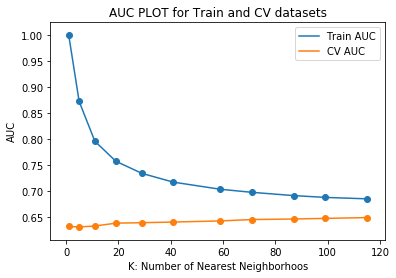

In [79]:
cross_validate_Knn(k_values,X_train_tfidfawv,y_train)

In [80]:
print("Hyper parameters:",k_values)

Hyper parameters: [1, 5, 11, 19, 29, 41, 59, 71, 87, 99, 115]


In [81]:
best_model=KNeighborsClassifier(n_jobs=-1,n_neighbors=19)

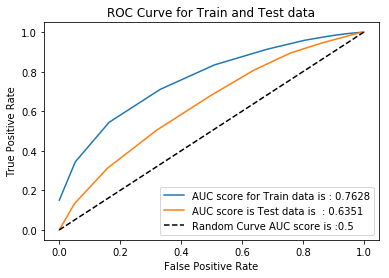

------------------------------------------------------------------------------------------
The Maximum value of 'TPR*(1-FPR)' is 0.4752368476360936 for 'THRESHOLD VALUE'of 0.842
------------------------------------------------------------------------------------------


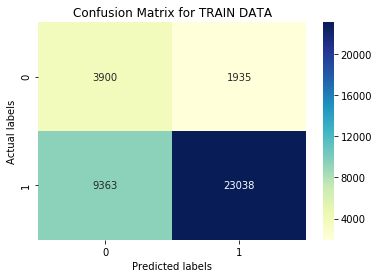

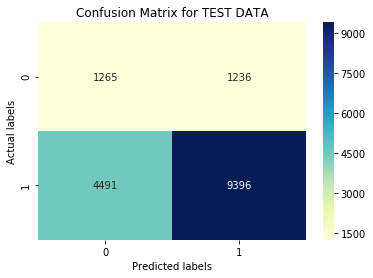

In [82]:
build_best_model_plot_roc(best_model,X_train_tfidfawv,y_train,X_test_tfidfawv,y_test)

# Task-2  

## Top 2000 features from TF-IDF SET

In [111]:
#Project_Title
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf_vectorizer.fit(X_train.project_title.values)
X_tr_title=tf_idf_vectorizer.transform(X_train.project_title.values)
X_te_title=tf_idf_vectorizer.transform(X_test.project_title.values)

#essay
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf_vectorizer.fit(X_train.essay.values)
X_tr_essay=tf_idf_vectorizer.transform(X_train.essay.values)
X_te_essay=tf_idf_vectorizer.transform(X_test.essay.values)

#Project_resource_Summary
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf_vectorizer.fit(X_train.project_resource_summary.values)
X_tr_resource=tf_idf_vectorizer.transform(X_train.project_resource_summary.values)
X_te_resource=tf_idf_vectorizer.transform(X_test.project_resource_summary.values)


X_train_tfidf=hstack((X_tr_vec,X_tr_title,X_tr_resource,X_tr_essay)).tocsr()
X_test_tfidf=hstack((X_te_vec,X_te_title,X_te_resource,X_te_essay)).tocsr()

In [113]:
print("Before selecting the top 2000 features from TF-IDF set shape:")
print("Training data set shape :",X_train_tfidf.shape)
print("Test data set shape :",X_test_tfidf.shape)

Before selecting the top 2000 features from TF-IDF set shape:
Training data set shape : (38236, 89543)
Test data set shape : (16388, 89543)


In [116]:

from sklearn.feature_selection import SelectKBest, chi2
select_2000 = SelectKBest(chi2, k=2000).fit(X_train_tfidf,y_train)

X_train_tfidf_2000=select_2000.tr=select_2000.transform(X_train_tfidf)
X_test_tfidf_2000=select_2000.tr=select_2000.transform(X_test_tfidf)


In [117]:
print("After selecting the top 2000 features from TF-IDF set shape:")
print("Training data set shape :",X_train_tfidf_2000.shape)
print("Test data set shape :",X_test_tfidf_2000.shape)

After selecting the top 2000 features from TF-IDF set shape:
Training data set shape : (38236, 2000)
Test data set shape : (16388, 2000)


100%|██████████| 11/11 [40:48<00:00, 222.59s/it]


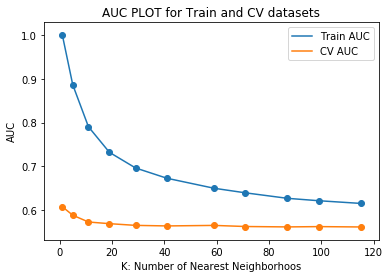

In [122]:
cross_validate_Knn(k_values,X_train_tfidf_2000,y_train)

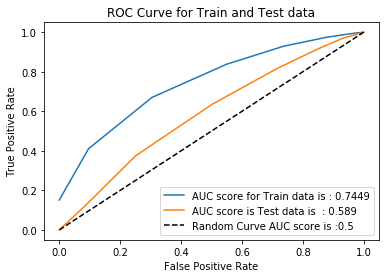

------------------------------------------------------------------------------------------
The Maximum value of 'TPR*(1-FPR)' is 0.46615741519080456 for 'THRESHOLD VALUE'of 0.895
------------------------------------------------------------------------------------------


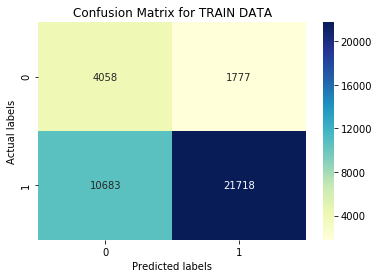

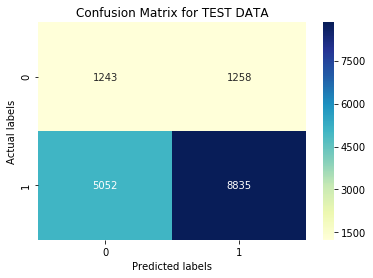

In [123]:
best_model=KNeighborsClassifier(n_jobs=-1,n_neighbors=19)
build_best_model_plot_roc(best_model,X_train_tfidf_2000,y_train,X_test_tfidf_2000,y_test)

## Summary

In [126]:
summary_table = PrettyTable()
summary_table.hrules=True

summary_table.field_names = ["Vectorizer", "Model","Traindata shape","Testdata shape","Best 'K'","Train AUC", "Test AUC"]
summary_table.add_row(["BOW", 'Cross_validate', (38236, 7101),(16388, 7101),41, .7049,.6285])
summary_table.add_row(["TF-IDF", 'Cross_validate', (38236, 7101),(16388, 7101),19, .7432,.6043])
summary_table.add_row(["AVG W2V", 'Cross_validate', (38236, 1001),(16388, 1001),11, .8041,.6428])
summary_table.add_row(["TF-IDF AVGW2V", 'Cross_validate', (38236, 1001),(16388, 1001),19, .7628,.6351])
summary_table.add_row(['Top2000(TF-IDF)','Cross_validate', (38236, 2000),(16388, 2000),19, .7449,.589])

summary_table.sortby='Test AUC'

print(summary_table)


+-----------------+----------------+-----------------+----------------+----------+-----------+----------+
|    Vectorizer   |     Model      | Traindata shape | Testdata shape | Best 'K' | Train AUC | Test AUC |
+-----------------+----------------+-----------------+----------------+----------+-----------+----------+
| Top2000(TF-IDF) | Cross_validate |  (38236, 2000)  | (16388, 2000)  |    19    |   0.7449  |  0.589   |
+-----------------+----------------+-----------------+----------------+----------+-----------+----------+
|      TF-IDF     | Cross_validate |  (38236, 7101)  | (16388, 7101)  |    19    |   0.7432  |  0.6043  |
+-----------------+----------------+-----------------+----------------+----------+-----------+----------+
|       BOW       | Cross_validate |  (38236, 7101)  | (16388, 7101)  |    41    |   0.7049  |  0.6285  |
+-----------------+----------------+-----------------+----------------+----------+-----------+----------+
|  TF-IDF AVGW2V  | Cross_validate |  (38236, 